# 1. Preparing datasets.

#### You can replace it with your own here.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import numpy as np

train_ds = tfds.load('imagenet2012',      
                       split='train', 
                       shuffle_files=True, 
                       # download=True, 
           as_supervised=True,)

valid_ds = tfds.load('imagenet2012',  
                   split='validation', 
                   shuffle_files=False, 
                   # download=True, 
                   as_supervised=True,)

# 2. Loading SCAN Decoder
#### Load the pre-trained SCAN decoder.

In [ ]:
from SCAN import SCAN

In [ ]:
target_model=tf.keras.applications.EfficientNetV2B0(input_shape=(224,224,3))

In [ ]:
scanner=SCAN(target_model = target_model, target_layer = 148)\
                .set_preprocess(tf.keras.applications.efficientnet_v2.preprocess_input)

In [ ]:
scanner.load_decoder('EfficientNetV2B0_layer(2)_a(8.0)')

# 3. SCAN Testing
#### It creates a Visual Explanation with the trained scan model.

In [ ]:
def resize(image, label):
    image = tf.image.resize(image, (224,224))
    return image, label

X,Y = valid_ds.map(resize).batch(50).take(1).get_single_element()

In [ ]:
i=0

self_confidence_map, reconstructed_image = scanner(X[i], percentile=1)

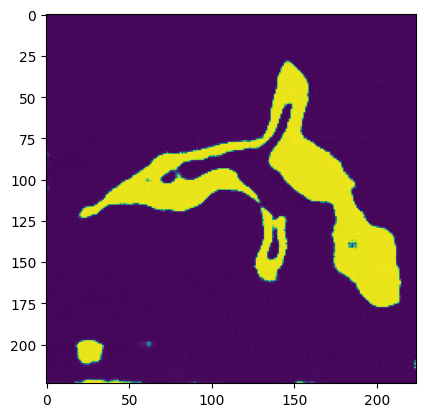

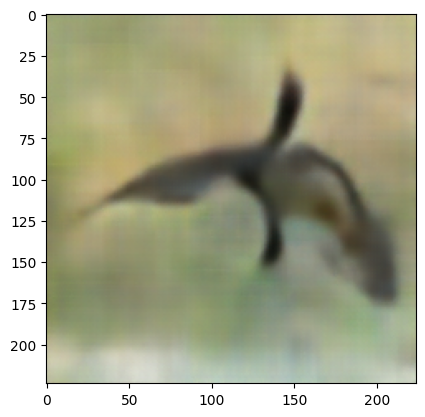

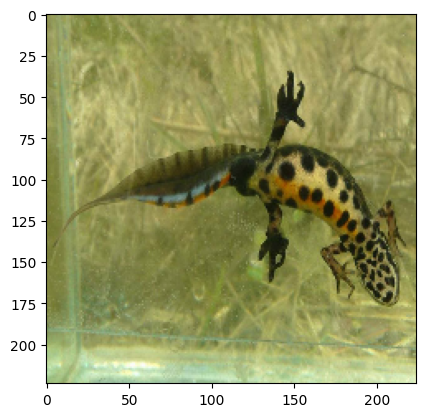

In [8]:
plt.imshow(self_confidence_map)
plt.show()

plt.imshow(reconstructed_image)
plt.show()

plt.imshow(X[i]/255)
plt.show()